# Multidimensional (N-d) Arrays: xarray, ERA5 Climate reanalysis

UW Geospatial Data Analysis  
CEE498/CEWA599  
David Shean  

## Objectives
* Introduce xarray data model for N-d array analysis
* Practice basic N-d array slicing, grouping and aggregation
* Explore global and local climate reanalysis data

## Discussion
* Can use these as input variables for analysis in your projects
    * correlating lake area with surface T evolution

## Introduction

This week we are going to do some basic analysis of climate reanalysis data.

We will use a few different products from the state-of-the-art ERA5 reanalysis, which currently span 1979-present with hourly timestep at 1/4° grid resolution (~30 km). Future releases will extent the record back to 1950.

We will use xarray to open, combine, analyze and plot the data.

## xarray

Take a moment to review this high-level introduction:
* http://xarray.pydata.org/en/stable/why-xarray.html

>"Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience."

It's also an excellent choice for working with large datasets, as it uses lazy evaluation and parallel processing with Dask: http://xarray.pydata.org/en/stable/dask.html#

So, what's an nD array? (https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html)  You've been using them all quarter, but mostly 1D and 2D NumPy arrays.  

As with many of the packages we've covered this quarter, vocabulary can be one of the biggest blocks to learning.  Let's discuss.

## DataSet overview
![xarray image with labels](http://matthewrocklin.com/blog/images/xarray-boxes-2.png)
(http://xarray.pydata.org/en/latest/data-structures.html#dataset)

### Comparison with Pandas

Pandas is very good at handling 2D tabular datasets (e.g., csv with columns and rows, time series of met station variables from a single station [T, precip, etc]).  
* "If your data fits nicely into a pandas DataFrame then you’re better off using one of the more developed tools there." (http://xarray.pydata.org/en/v0.7.2/plotting.html)
* "pandas excels at working with tabular data. That suffices for many statistical analyses, but physical scientists rely on N-dimensional arrays – which is where xarray comes in." (http://xarray.pydata.org/en/stable/why-xarray.html#goals-and-aspirations)

xarray extends the Pandas functionality to support 3+ dimensions (e.g., time series of 2D rasters).

#### xarray is to Pandas...

* xarray DataArray : Pandas DataSeries
* xarray DataSet : Pandas DataFrame

### DataArray
Four essential pieces:
* `values`: a numpy.ndarrays with actual data values (e.g., ('t2m', 'tp')
* `dims`: dimension names for each axis (e.g., ('lon', 'lat', 'time'))
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: an OrderedDict containing additional metadata (attributes)

### Dataset
* Essentially, a collection of DataArrays (like a dictionary of DataArrays)
* http://xarray.pydata.org/en/latest/data-structures.html#dataset

Notes:
* One value in one of the contained arrays (say a single temperature measurement) usually has multiple coordinates ('lon', 'lat', 'time')

### Essential xarray examples and references
* Indexing and selection: http://xarray.pydata.org/en/stable/index.html
* Plotting: http://xarray.pydata.org/en/stable/plotting.html
* Visualization examples: http://xarray.pydata.org/en/stable/examples/visualization_gallery.html
* Time-series analysis: http://xarray.pydata.org/en/stable/time-series.html
* https://rabernat.github.io/research_computing/xarray.html

## netCDF format

* https://en.wikipedia.org/wiki/NetCDF
* https://www.unidata.ucar.edu/software/netcdf/

## ERA5 Reanalysis Data

ERA5 = "ECMWF ReAnalysis 5"  
ECMWF = "European Centre for Medium-Range Weather Forecasts"

"ERA5 provides hourly estimates of a large number of atmospheric, land and oceanic climate variables. The data cover the Earth on a 30km grid and resolve the atmosphere using 137 levels from the surface up to a height of 80km."

"ERA5 combines vast amounts of historical observations into global estimates using advanced modelling and data assimilation systems."

* https://confluence.ecmwf.int/display/CKB/What+is+ERA5

### Variables
Hundreds of output variables for each hourly timestep. See a list of all of the available variables:
* https://apps.ecmwf.int/codes/grib/param-db

### Resolution
The ERA5 HRES (High Resolution) data has a native resolution of 0.28125 degrees (31km)
* https://confluence.ecmwf.int/display/CKB/ERA5%3A+What+is+the+spatial+reference

### Data Availability
For this lab, I prepared some sample datasets, but for future reference, you can access the ERA5 data directly!

#### From CDS (Climate Data Store)
The CDS API allows you to request subsets of ERA5 products for desired spatial extent, time periods, time intervals, etc.:
* https://cds.climate.copernicus.eu/api-how-to
* https://confluence.ecmwf.int/display/CKB/How+to+download+ERA5

#### Available on Amazon S3
* https://registry.opendata.aws/ecmwf-era5/

## Download the prepared dataset sample
* We could request directly fro CDS API, but this will require at least 5-10 minutes to fulfill, maybe hours
* I downloaded some sample ERA5 datasets, created a zip file, staged and shared on Google Drive (accessible to anyone with link)
    * https://drive.google.com/open?id=1gomQR_lvhuww_xyR6wcUiziS12x1yCSx
* We can use the `drivanon` convenience package to easily download anonymously without authentication

In [1]:
import os
from glob import glob

In [ ]:
#Clone master and install
if not os.path.exists('driveanon'):
    !git clone https://github.com/tjcrone/driveanon.git
%cd driveanon
!pip install .
%cd ..
import driveanon as da

In [2]:
if not os.path.exists('era5'):
    os.makedirs('era5')

In [3]:
blob_id = '1bW9FRpnLGCDPsy0khcEfcL7A07ZmgJw6'
out_fn = 'era5/era5_week10.tar'
if not os.path.exists(out_fn):
    da.save(blob_id, filename=out_fn)
    !tar -xvf era5/era5_week10.tar -C era5
    !unzip -d era5 era5/era5_climatology_1979-2018_1month.zip

Note: The following will take a few minutes, take the time to review the remainder of the lab

In [4]:
blob_id = '1gomQR_lvhuww_xyR6wcUiziS12x1yCSx'
out_fn = 'era5/era5_climatology_t_anomaly_1979-2018_1month.zip'
if not os.path.exists(out_fn):
    da.save(blob_id, filename=out_fn)
    !unzip -d era5 era5/era5_climatology_t_anomaly_1979-2018_1month.zip

## Install necessary packages to open GRIB files (default ERA5 format) with xarray

https://github.com/ecmwf/cfgrib

While you wait, open a terminal and inspect the contents of the era5 directory, and review this information
* http://xarray.pydata.org/en/stable/io.html#grib-format-via-cfgrib

In [ ]:
!conda install -y -c conda-forge cfgrib

## OK, let's get started with the data analysis already!

In [5]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## Get the WA state outline

In [6]:
#states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'
states_gdf = gpd.read_file(states_url)

In [7]:
wa_state = states_gdf.loc[states_gdf['NAME'] == 'Washington']

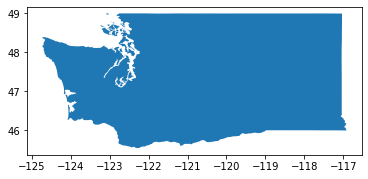

In [8]:
wa_state.plot();

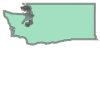

In [306]:
wa_geom = wa_state.iloc[0].geometry
wa_geom

In [9]:
wa_bounds = wa_state.total_bounds
wa_bounds

array([-124.733174,   45.543541, -116.915989,   49.002494])

In [10]:
def myround(x, base=0.25):
    return base * np.round(x/base)

def roundbounds(bounds, base=0.25):
    bounds_floor = np.floor(wa_bounds/base)*base
    bounds_ceil = np.ceil(wa_bounds/base)*base
    return [bounds_floor[0], bounds_floor[1], bounds_ceil[2], bounds_ceil[3]]

In [11]:
wa_rbounds = roundbounds(wa_bounds)
wa_rbounds

[-124.75, 45.5, -116.75, 49.25]

# Part 1: Global climatology
## Monthly temperature from 1979-2018
* Two files are provided:
    1. Climatology - long-term mean monthly values ofrom 1981-2010 (12 grids)
    2. Anomaly - monthly difference from long-term monthly mean (480 grids from 1979-2018)
* https://cds.climate.copernicus.eu/cdsapp#!/dataset/ecv-for-climate-change?tab=overview
* http://datastore.copernicus-climate.eu/c3s/published-forms/c3sprod/ecv-for-climate-change/PUG-ecv-for-climate-change.pdf
* See here for explanation of how they are calculated: http://xarray.pydata.org/en/stable/examples/weather-data.html#Calculate-monthly-anomalies
* http://xarray.pydata.org/en/latest/examples/monthly-means.html

TO DO: Update to latest ERA5 monthly values, create groupby exercise to generate climatology and anomaly:
* http://xarray.pydata.org/en/stable/examples/weather-data.html

Note that precip anomalies are on Gaussian grid (rgg), so we'll skip for now: https://confluence.ecmwf.int/display/FCST/Gaussian+grids

In [12]:
datadir = 'era5'

In [13]:
cd $datadir

/home/jovyan/09_xarray_ERA5/era5


## Function to load and combine grib files into a single xarray DataSet
* Also creates a new, compressed netcdf (nc) file to store the data for future use
* See relevant doc on opening and writing files: http://xarray.pydata.org/en/stable/io.html

In [14]:
def grib2netcdf(out_fn, writeout=True):
    if not os.path.exists(out_fn):
        #Get all grib filenames in the directory
        paths = sorted(glob(os.path.splitext(out_fn)[0]+'*.grib'))
        #Generate xarray dataset list, opening with cfgrib engine
        datasets = [xr.open_dataset(p, engine='cfgrib') for p in paths]
        #Concatenate all datasets along the time axis
        combined = xr.concat(datasets, dim='time')
        #Drop unnecessary coordinates
        combined = combined.drop(['number', 'surface', 'step', 'valid_time'])
        if writeout:
            #Set up encoding parameters to use compression when writing netcdf file
            comp = dict(zlib=True, complevel=9)
            encoding = {var: comp for var in combined.data_vars}
            #Write out
            combined.to_netcdf(out_fn, encoding=encoding)
    else:
        combined = xr.open_dataset(out_fn)
    return combined

## Process and open global monthly temperature anomaly and climatology
* Note that processing and saving the anomalies could take some time, as you're reading in 480 files and saving a large nc file
* Take a moment to review the steps in the above function and the io doc for xarray
    * Note the `open_dataset` and `concat` functions

In [15]:
out_fn = 'climatology_0.25g_ei_2T.nc'
t_clim_ds = grib2netcdf(out_fn)

In [16]:
out_fn = '1month_anomaly_Global_ei_2T.nc'
t_anom_ds = grib2netcdf(out_fn)

## Inspect the DataSets
* Discuss with your neighbor
* Review the output of the `info()` method
* Note the number of time slices in each DataSet
* What are the min and max longitude, min and max latitude
* Note: The year listed in the climatology dataset is arbitrary at 2016, as these are monthly means for the 1981-2010 period
* print info for the 't2m' DataArray (temperature 2 m above ground)

In [17]:
t_clim_ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 12)
Coordinates:
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-03-03T04:55:21 GRIB to CDM+CF via cfgrib-0....

In [18]:
t_anom_ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 480)
Coordinates:
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-03-03T04:55:39 GRIB to CDM+CF via cfgrib-0....

### How many total grid cells are there in each time slice of the two DataSets?

### How much memory would this dataset occupy in RAM? Is this consistent with observed usage?

## Convert the temperature values from K to C for the climatology dataset
* Note: don't need to do this for anomalies, as they are relative values, not absolute
* These operations are done on the DataArray level (not the top-level DataSet object level), so you'll need to modify `t_clim_ds['t2m']`
    * You can use `-=` syntax here
    * Or, update the `t_clim_ds['t2m'].values`
* Make sure you also update the units
    * The units used by xarray are stored in the t_clim_ds['t2m'].attrs dictionary
    * There is also a GRIB units variable, but this is holdover from the grib to xarray conversion
* Sanity check values

## Set the longitude values to be (-180 to 180) instead of (0 to 360)

In [185]:
def ds_swaplon(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [188]:
t_clim_ds = ds_swaplon(t_clim_ds)
t_anom_ds = ds_swaplon(t_anom_ds)

In [189]:
t_clim_ds.longitude

<xarray.DataArray 'longitude' (longitude: 1440)>
array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75])
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8

## Combine the climatology with anomaly to get absolute monthly mean

In [29]:
if False:
    t_month_ds = t_anom_ds.copy(deep=True)
    for i in range(1,13):
        idx = t_anom_ds['t2m'].time.dt.month == i
        t_month_ds['t2m'].loc[idx] += t_clim_ds['t2m'].sel(time='2016-%02i-01' % i)

## Create a Facet plot showing temperature grids for each month in the climatology DataSet
* http://xarray.pydata.org/en/stable/plotting.html#faceting
* Make sure your units are correct in the colorbar
* Take a moment to admire this, look at seasonal cycles

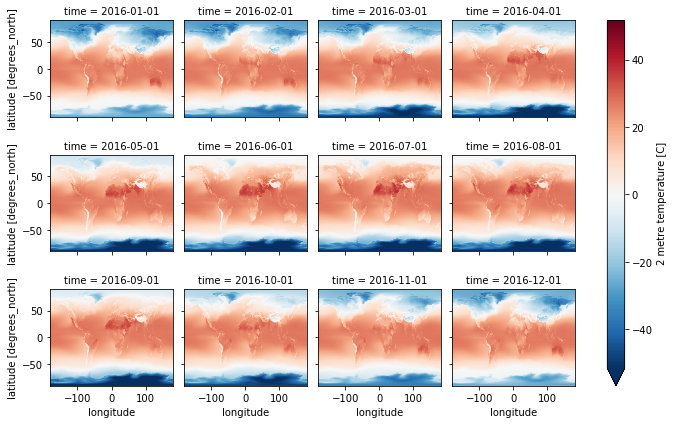

## Use Holoviz for interactive plotting
* Multiple plotting backends can be used with xarray
    * We previously used Seaborn, and folium/ipyleaflet for interactive maps
* Still under development, but `hvplot` is flexible and powerful:
    * https://holoviz.org/

In [31]:
import hvplot.xarray 

#### Create interactive plot with hvplot()
* Note how coordinates and values are interactively displayed as you move your cursor over the plot
* Experiment with time slider on right side
* Experiment with zoom/pan capability

In [191]:
t_clim_ds['t2m'].hvplot(x='longitude',y='latitude', cmap='RdBu_r', clim=(-50,50))

:DynamicMap   [time]
   :Image   [longitude,latitude]   (t2m)

## Isolate the August array and plot
* Review different strategies for selection here: http://xarray.pydata.org/en/stable/indexing.html
* Use the `isel` method with dimension name and integer index (`time=7`)
* Use the `sel` method with dimension name and label (`time='2016-08-01'`)

In [193]:
#See time dimension index
t_clim_ds.time

<xarray.DataArray 'time' (time: 12)>
array(['2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

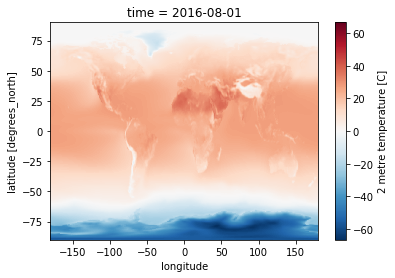

## Create a plot for August, overlaying coastlines with cartopy
Use a simple PlateCaree() projection as in example here:
* https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

Once you have your axes setup, you should be able to plot with xarray easily (pass the axes object to `plot()` function:
* http://xarray.pydata.org/en/stable/plotting.html#maps  
Don't use a discrete color ramp as in some of the examples, use a continuous linear color ramp, as in the facet plot.

Note how 2-m temperature varies with elevation (e.g., see the Tibetan Plateau)

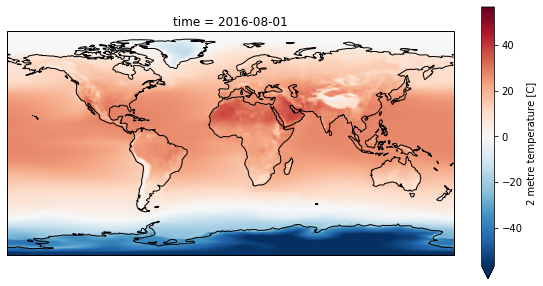

## Clip to WA state

In [378]:
wa_rbounds

[-124.75, 45.5, -116.75, 49.25]

In [379]:
#This is not working for latitude...
t_clim_ds['t2m'].sel(latitude=slice(wa_rbounds[1],wa_rbounds[3]), longitude=slice(wa_rbounds[0],wa_rbounds[2]));

## Create line plot of global monthly temperature
* Compute the mean of the climatology t2m DataArray across the spatial dimensions (can use `dim=('latitude', 'longitude')` for this)

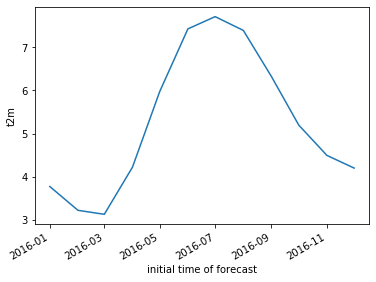

## Create 2D plots showing mean temperature vs. latitude (averaged over all longitudes)

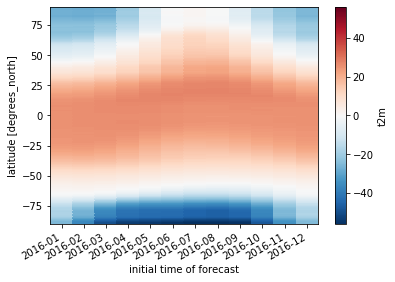

## Create line plots of mean zonal and meridional temperature
* https://en.wikipedia.org/wiki/Zonal_and_meridional
* Hint: specify a tuple of appropriate dimensions for the `dim` keyword when computing `mean()`
    * Above we used `dim=('latitude', 'longitude')` to average all latitudes and longitudes, plotting the resulting values over time
    * Now in the zonal mean case, we want to average for all latitudes and times, plotting resulting values vs. longitude
* Create as figure with two subplots: meridional mean T and zonal mean T
* Add titles accordingly

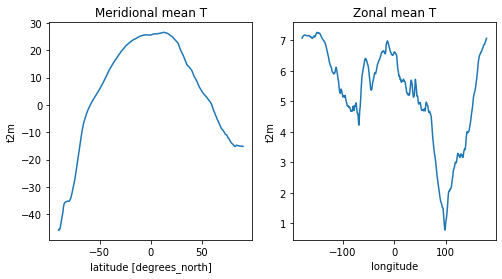

## Create a plot showing monthly mean temperature for the Arctic and Antarctic
* See location indexing here: http://xarray.pydata.org/en/stable/indexing.html#assigning-values-with-indexing
* One approach:
    * Create boolean index arrays for `t_clim_ds['latitude']` coordinate for relevant latitude ranges
        * Use Arctic circle and Antarctic circle as a threshold
            * https://en.wikipedia.org/wiki/Arctic_Circle
    * Use the index array with xarray `where` method on the `t_clim_ds['t2m']` DataArray
        * Make sure to use `drop=True` to avoid unnecessarily storing lots of nan values in memory
    * Compute the mean across all returned lat/lon grid cells
* Note the magnitude and phase of the seasonal temperature varability at the opposite poles

In [394]:
polar_lat = 66.5

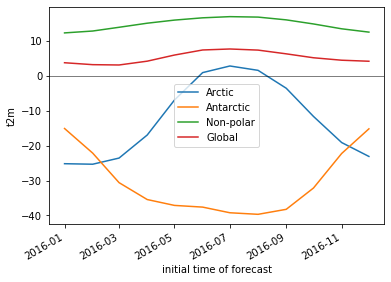

## Extra Credit: Repeat the above analysis, isolating land and ocean classes
* Hint: can use `rioxarray` for clipping using a GeoDataFrame or geometry

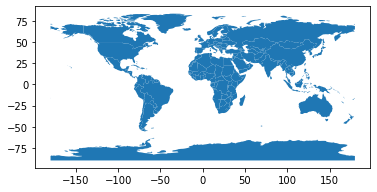

In [245]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#Hack to set to latest PROJ syntax, instead of 'init'
world.crs = 'EPSG:4326'
world.plot();

In [ ]:
!conda install -y -c conda-forge rioxarray

In [215]:
import rioxarray

In [263]:
t_clim_ds_land = t_clim_ds['t2m']
t_clim_ds_ocean = t_clim_ds['t2m']

In [264]:
t_clim_ds_land.rio.write_crs(world.crs, inplace=True);
t_clim_ds_ocean.rio.write_crs(world.crs, inplace=True);

In [265]:
t_clim_ds_land = t_clim_ds_land.rio.clip(world.geometry, crs=world.crs, drop=False)
t_clim_ds_ocean = t_clim_ds_ocean.rio.clip(world.geometry, crs=world.crs, drop=False, invert=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


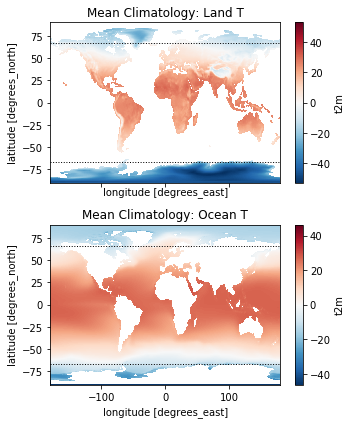

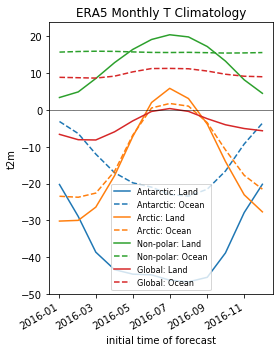

# Temporal Variability: Anomalies

I heard somewhere that climate change was a hoax.  Let's check.

To do this, we will use the monthly anomalies from 1979-present.

## Create a line plot of mean global monthly temperature anomaly from 1979-present
* This should be a simple one-liner
* Note: if you opened an existing `nc` file and this is the first time reading the entire `t_anom_ds` from disk, this may take ~10-20 seconds

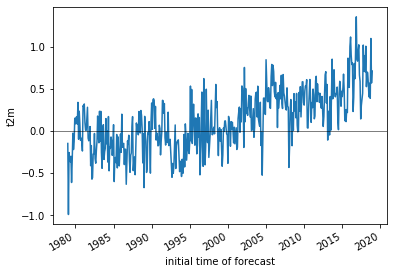

## Did the Arctic and Antarctic warm at the same rate over the past 40 years?
* Create a quick line plot showing anomalies for each region, you can reuse indices from above

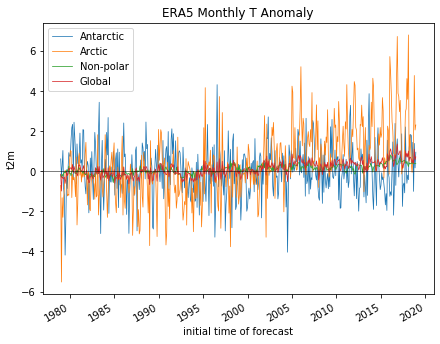

## Extra credit: compute linear temperature trend at each pixel and create a map with coastlines

## Extra credit: Group temperature anomalies by decade
* See pandas/xarray `resample` function
* Relevant aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
* How does the most recent decade compare with the first decade in the time series?

# Part 2: Hourly data for WA state

## Load the WA temperature, precipitation and snow depth products
* Note: these are extracted for 12:00 UTC
* Really want daily averages for much of this, but I didn't have time to go back and requery ERA5
* Let's use what we have to play around

In [166]:
fn = 'era5_WA_t_1979-2018_1200.grib'
wa_t = xr.open_dataset(fn, engine='cfgrib')
wa_t = wa_t.drop(['number', 'surface', 'step', 'valid_time'])
wa_t -= 273.15
wa_t['t2m'].attrs['units'] = 'C'

In [167]:
wa_t

<xarray.Dataset>
Dimensions:    (latitude: 15, longitude: 32, time: 14610)
Coordinates:
  * latitude   (latitude) float64 49.0 48.75 48.5 48.25 ... 46.0 45.75 45.5
  * longitude  (longitude) float64 -124.8 -124.5 -124.2 ... -117.5 -117.2 -117.0
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 ... 2018-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 -10.595612 ... -8.961517
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-08-09T02:44:38 GRIB to CDM+CF via cfgrib-0....

In [168]:
fn = 'era5_WA_ppt_1979-2018_1200.grib'
wa_tp = xr.open_dataset(fn, engine='cfgrib')
wa_tp = wa_tp.drop(['number', 'surface', 'step', 'valid_time'])
#Hack: the cdsapi returned values at 06:00 instead of 12:00 for precip
wa_tp['time'] = wa_tp['time'] + np.timedelta64(6, 'h')
#Convert meters to mm
wa_tp *= 1000
wa_tp['tp'].attrs['units'] = 'mm'

In [169]:
wa_tp

<xarray.Dataset>
Dimensions:    (latitude: 15, longitude: 32, time: 14610)
Coordinates:
  * latitude   (latitude) float64 49.0 48.75 48.5 48.25 ... 46.0 45.75 45.5
  * longitude  (longitude) float64 -124.8 -124.5 -124.2 ... -117.5 -117.2 -117.0
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 ... 2018-12-31T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 0.0 0.0 ... 0.042915344
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-08-09T02:48:26 GRIB to CDM+CF via cfgrib-0....

In [170]:
fn = 'era5_WA_sd_1979-2018_1200.grib'
wa_sd = xr.open_dataset(fn, engine='cfgrib')
wa_sd = wa_sd.drop(['number', 'surface', 'step', 'valid_time'])

In [171]:
wa_sd

<xarray.Dataset>
Dimensions:    (latitude: 15, longitude: 32, time: 14610)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 ... 2018-12-31T12:00:00
  * latitude   (latitude) float64 49.0 48.75 48.5 48.25 ... 46.0 45.75 45.5
  * longitude  (longitude) float64 -124.8 -124.5 -124.2 ... -117.5 -117.2 -117.0
Data variables:
    sd         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-08-09T02:49:53 GRIB to CDM+CF via cfgrib-0....

## Merge the WA datasets
* http://xarray.pydata.org/en/stable/combining.html
* Inspect the output - note how multiple DataArrays are stored

## Compute seasonal mean values for each variable
* This is a simple `groupby()` and `mean()`
* Inspect the output values - do these make sense?

In [368]:
#Hack to reorder seasons, as default is alphabetical
#order = np.array(['DJF', 'MAM', 'JJA', 'SON'], dtype=object)
order = np.array([0,2,1,3])
#wa_merge_seasonal_mean.season.values
wa_merge_seasonal_mean = wa_merge_seasonal_mean.isel(season=order)

## Plot seasonal mean grids
* Note that plot will assume `x='longitude', y='latitude'`, but can also explicitly specify

In [370]:
wa_merge_seasonal_mean.data_vars

Data variables:
    t2m      (season, latitude, longitude) float32 0.32848698 ... 1.2349453
    tp       (season, latitude, longitude) float32 0.42719394 ... 0.08173676
    sd       (season, latitude, longitude) float32 0.051241174 ... 0.0054595415

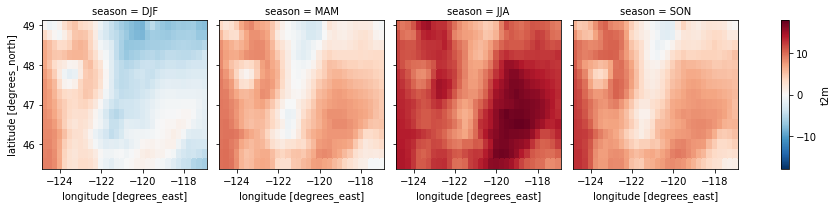

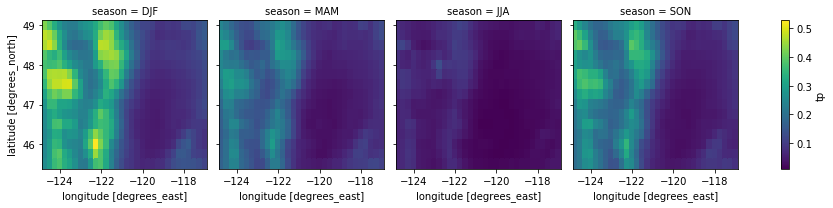

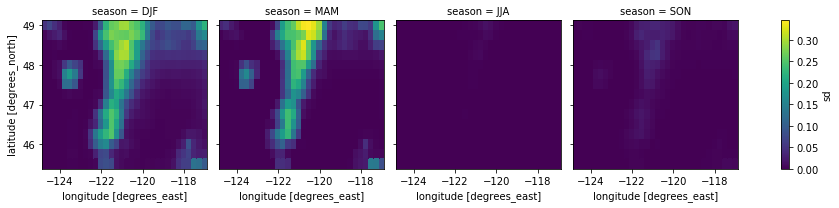

In [371]:
for i in wa_merge_seasonal_mean.data_vars:
    wa_merge_seasonal_mean[i].plot(col='season')

## Compute mean monthly values for WA state

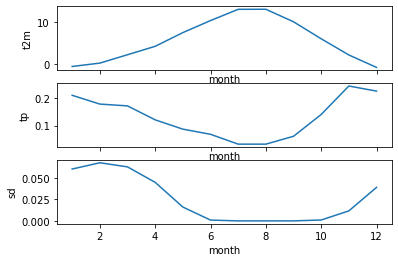

## Helper function for plotting WA grids with state outline overlay

In [474]:
def plotwa(ds_in, v_list=['t2m','tp','sd'], op='mean'):
    f,axa = plt.subplots(1,3, figsize=(12,2), sharex=True, sharey=True)
    for i,v in enumerate(v_list):
        ds_in[v].plot(ax=axa[i], robust=True)
        wa_state.plot(ax=axa[i], facecolor='none', edgecolor='black')
        axa[i].set_title('WA State ERA5 Hourly: %s %s' % (op, v))
    f.tight_layout()

## Create some plots of descriptive stats (mean, max, min, std) for 1979-present
* Pass the relevant dataset (e.g. `wa_merge.mean('time')`) to the `plotwa` helper function
* What do these metrics tell you?
    * What is causing most of the temperature variability captured by the std?
    * What is the highest temperature value

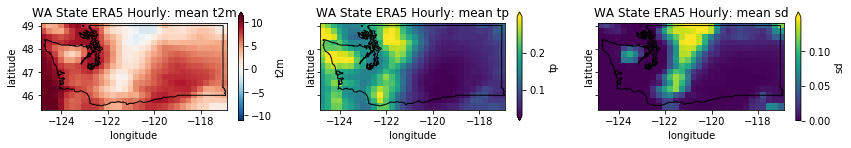

In [475]:
plotwa(wa_merge.mean('time'), op='mean')

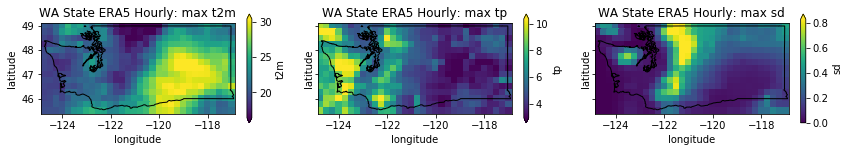

In [469]:
plotwa(wa_merge.max('time'), op='max')

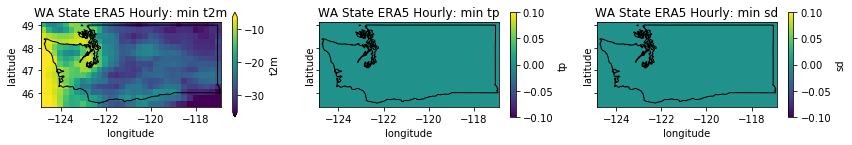

In [470]:
plotwa(wa_merge.min('time'), op='min')

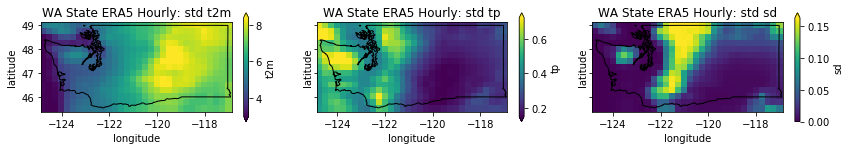

In [471]:
plotwa(wa_merge.std('time'), op='std')

## Create a plot showing the conditions the day before and after the Mt. St. Helen's eruption

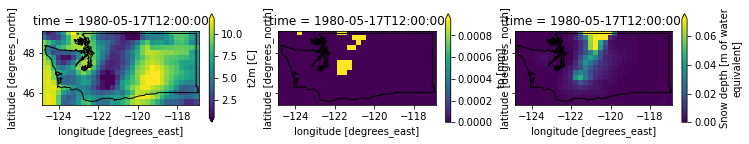

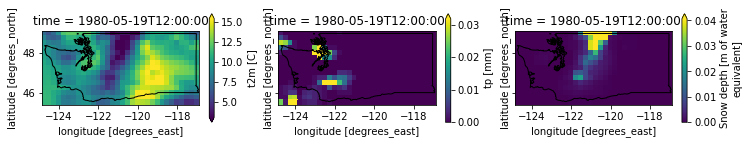

In [289]:
pre = wa_merge.sel(time='1980-05-17')
plotwa(pre)
post = wa_merge.sel(time='1980-05-19')
plotwa(post)

## Extract the time series for Seattle and Mt. Rainier temperature and create line plot
* You'll need to look up coordinates
    * Check the longitude system in the DataArrays (-180 to 180, or 0 to 360)
* Can use the `sel()` method to extract time series for the grid cell nearest the specified 'longitude' and 'latitude' coordinates
    * http://xarray.pydata.org/en/stable/indexing.html
    * Remember, these are large grid cells (~31x31 km), so one grid cell could cover the most of Mt. Rainier (a single temperature value that includes the cold summit and the warmer, lowland river valleys)
* Sanity check

In [290]:
sea_coord = (-122.25, 47.5)
rainier_coord = (121.7603, 46.8523)

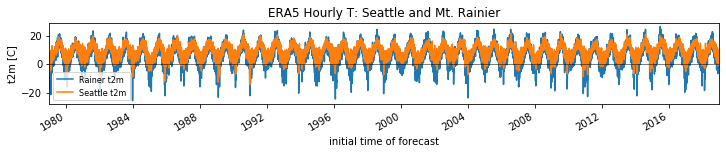

In [ ]:
t_mm = ('2018-01-01','2019-01-01')

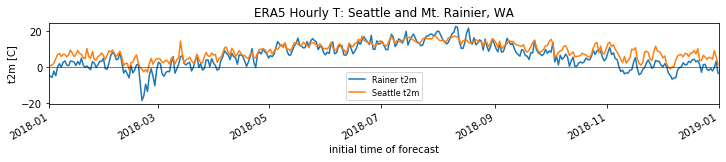

## Helper function to plot time series

In [295]:
def plotv(ds_in, v_list=['t2m','tp','sd']):
    f,axa = plt.subplots(3,1, figsize=(10,6), sharex=True)
    for i,v in enumerate(v_list):
        ds_in[v].plot(ax=axa[i], lw=0.5)
        axa[i].axhline(0,color='k',lw=0.5)
    f.tight_layout()

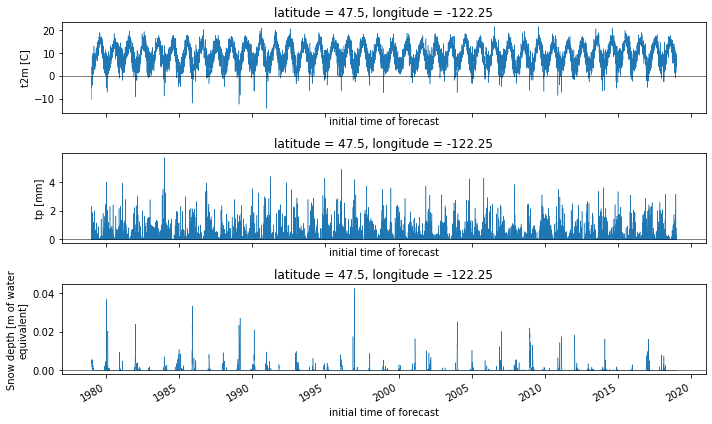

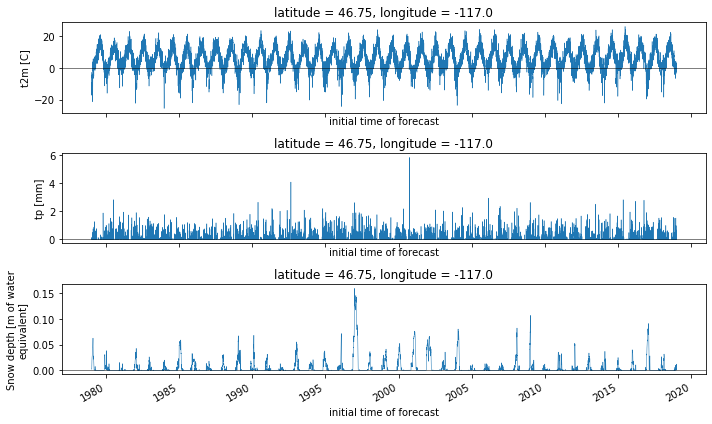

## Compute stats for monthly, annual time periods
* Can use `groupby('time.year').max(dim='time')`
* Plot snow depth for April and September

## Create a map that shows the year containing the maximum T value at each grid cell
* These should mostly be in the most recent decade


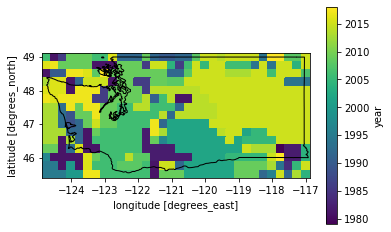

# Extra Credit

## Create a new xarray Dataset with the SNOTEL data from Lab08

## Export one of the derived WA grids to rasterio
* https://github.com/robintw/XArrayAndRasterio/blob/master/rasterio_to_xarray.py

## Load SRTM DEM for WA
* Resample

## Plot contours from SRTM DEM over temperature grid

## Compute correlation between temperature and elevation
* https://github.com/pydata/xarray/issues/1115

## Compute atmospheric temperature lapse rate using SRTM elevations

# What if my data are too big?
* http://xarray.pydata.org/en/stable/dask.html